In [1]:
import requests
import pandas as pd
import numpy as np

In [2]:
df_address = pd.read_csv('./data/address.csv', index_col=0)

In [3]:
df_address.head()

,lat,lon,sido,sigungu,sigungu_split,bjdong,bjdong_code,hjdong,hjdong_cd
0,35.482372,128.002660,경상남도,합천군,NaN,둔내리,4889044024,가회면,4889044000
1,37.584490,126.967926,서울특별시,종로구,NaN,신교동,1111010200,청운효자동,1111051500
2,37.584682,126.973145,서울특별시,종로구,NaN,궁정동,1111010300,청운효자동,1111051500
3,37.582650,126.971930,서울특별시,종로구,NaN,효자동,1111010400,청운효자동,1111051500
4,37.580544,126.972466,서울특별시,종로구,NaN,창성동,1111010500,청운효자동,1111051500


In [4]:
df_theater = pd.read_csv('./data/KC_497_DMSTC_MCST_THEART_2020.csv', index_col=0)
df_theater.head()

,lclas,mlsfc,id_poi,poi_nm,branch_nm,sub_nm,mcate_cd,mcate_nm,pnu,sido_nm,...,rd_cd,rd_nm,bld_num,x,y,grid_cd,lst_updt_dt,data_orgn,FILE_NAME,base_ymd
id,,,,,,,,,,,,,,,,,,,,,
KC497PP19N000001,장소,문화시설,10081284,CGV,북포항점,NaN,100208,CGV,4711310700102350004,경상북도,...,4.711333e+11,서동로,93,129.368199,36.040708,마마682842,20201231,KT,KC_497_DMSTC_MCST_THEART_2020,20201231
KC497PP19N000002,장소,문화시설,10210261,CGV,김해점,NaN,100208,CGV,4825010800111310004,경상남도,...,4.825033e+11,내외중앙로,137,128.868604,35.242204,마라245949,20201231,KT,KC_497_DMSTC_MCST_THEART_2020,20201231
KC497PP19N000003,장소,문화시설,10253565,메가박스,제천점,NaN,100212,메가박스,4315010400111450000,충청북도,...,4.315045e+11,의병대로18길,1,128.212341,37.135293,라사632043,20201231,KT,KC_497_DMSTC_MCST_THEART_2020,20201231
KC497PP19N000004,장소,문화시설,10253568,제물포극장,NaN,NaN,100202,일반극장/영화관,2817710100100530006,인천광역시,...,2.817732e+11,수봉로,3,126.656531,37.465808,다사254410,20201231,KT,KC_497_DMSTC_MCST_THEART_2020,20201231
KC497PP19N000005,장소,문화시설,10253586,국도복합영화관,NaN,NaN,100202,일반극장/영화관,4513011700100120001,전라북도,...,4.513033e+11,아리랑로,9,126.714745,35.984541,다마292767,20201231,KT,KC_497_DMSTC_MCST_THEART_2020,20201231


In [5]:
df_theater['poi_nm'].unique()

array(['CGV', '메가박스', '제물포극장', '국도복합영화관', '예당시네마', '안동극장', '가고파극장',
       '아카데미극장', '선사시네마', '석계극장', '옥포극장', '아리랑시네센터', '동보극장', '다모아극장',
       '명성극장', '명보극장', '경동극장', '시네마월드', '세종극장', '낙원극장', '귀빈극장', '대백예술극장',
       '국도극장', '바다극장', '밀양시네마', '문화극장', '동화극장', '동원극장', '동성아트홀', '창원시네마',
       '중앙극장', '피카디리극장', '탐라극장', '롯데시네마', '구미자동차극장', '메카DVD앤VIDEO',
       '영화속으로', '떼아뜨로중구', 'KT&G상상마당시네마', '시네마테크KOFA', '아트하우스모모', '필름포럼',
       '실버영화관', '월드시네마', '시네세븐', '시네마하우스', '리턴휴', '알리바이', '양평시네마', '세민극장',
       '동광극장', '폭스DVD영화관', '시네마천국DVD', 'DVD시네마', '엔피아영화관', '서귀포관광극장',
       '삼화비디오감상실', '한누리시네마', '시네하우스극장', 'DVD시네마영화관', '그랜드호텔영화관', '효성극장',
       '살곶이자동차극장', '시네극장', '디브이디키네마영화관', '로데오DVD방', '시네마컬처클럽',
       '허리우드비디오감상실', '시네마랜드디브이디감상실', '고도디지털영화관', '피퍼영화감상실', '디포시네마',
       '시네마엠디비디방', '팝스디브이디', '스타워즈', '룩디비디', '멀티플러스', '다우존DVD영화관',
       '스타디브이디', '로빈영상비디오', '팝스DVD', '조이프래닛', '디브이디마기클럽', '블루디브이디영화관',
       '21세기비디오방', 'MDVD', '매니아랜드영화관', '메가맥스', '스카이디브디영화관', '시네마테크협의회',
       '뉴욕비디오

,poi_nm,sido_nm,sgg_nm,bemd_nm,ri_nm,beonji,badm_cd,hadm_cd,x,y
id,,,,,,,,,,
KC497PP19N001126,캠프DVD앤VIDEO,강원도,춘천시,효자동,NaN,632-1,4211011200,4211064000,127.744902,37.872760
KC497PP19N000561,메가박스,강원도,원주시,반곡동,NaN,1903-3,4213011700,4213067500,127.986484,37.327802
KC497PP19N001117,아이맥스영화관,강원도,속초시,조양동,NaN,1545-1,4221010800,4221058000,128.582599,38.190817
KC497PP19N000243,씨네파크,강원도,인제군,북면,원통리,711-18,4281032021,4281032000,128.203134,38.122570
KC497PP19N001127,CGV,강원도,춘천시,퇴계동,NaN,1017,4211012300,4211066000,127.744049,37.850664
...,...,...,...,...,...,...,...,...,...,...
KC497PP19N001049,CGV,충청북도,청주시 흥덕구,가경동,NaN,1416-3,4311311300,4311374700,127.431152,36.626178
KC497PP19N000655,향수시네마,충청북도,옥천군,옥천읍,문정리,408-15,4373025022,4373025000,127.575640,36.304000
KC497PP19N000658,럭셔리박스,충청북도,청주시 청원구,내덕동,NaN,721-14,4311410200,4311452000,127.477775,36.659410


In [7]:
def match_bjdong(d):
    
    bjdong_code,hjdong_code = d['badm_cd'], d['hadm_cd']
    query = (df_address['bjdong_code']==bjdong_code) & (df_address['hjdong_cd']==hjdong_code)
    result = df_address[query]
    if len(result) ==1:
        result = result.values.tolist()[0]
        return pd.Series(tuple(result))
    else:
        query = (df_address['bjdong_code']==bjdong_code)
        result = df_address[query].values.tolist()[0]
        return pd.Series(tuple(result))
        

In [8]:
df_theater[['dong_y','dong_x',
            'sido','sigungu','sigungu_split',
            'bjdong','bjdong_code','hjdong','hjdong_code']] = df_theater.apply(match_bjdong, axis=1)

In [9]:
df_theater.head()

,poi_nm,sido_nm,sgg_nm,bemd_nm,ri_nm,beonji,badm_cd,hadm_cd,x,y,grid_cd,dong_y,dong_x,sido,sigungu,sigungu_split,bjdong,bjdong_code,hjdong,hjdong_code
id,,,,,,,,,,,,,,,,,,,,
KC497PP19N000001,CGV,경상북도,포항시 북구,덕산동,NaN,235-4,4711310700,4711352000,129.368199,36.040708,마마682842,36.042060,129.36417,경상북도,포항시,북구,덕산동,4711310700,중앙동,4711352000
KC497PP19N000002,CGV,경상남도,김해시,내동,NaN,1131-4,4825010800,4825054000,128.868604,35.242204,마라245949,35.243650,128.86308,경상남도,김해시,NaN,내동,4825010800,내외동,4825054000
KC497PP19N000003,메가박스,충청북도,제천시,남천동,NaN,1145,4315010400,4315053700,128.212341,37.135293,라사632043,37.135353,128.21407,충청북도,제천시,NaN,남천동,4315010400,남현동,4315053700
KC497PP19N000004,제물포극장,인천광역시,미추홀구,숭의동,NaN,53-6,2817710100,2817753000,126.656531,37.465808,다사254410,37.463985,126.65057,인천광역시,미추홀구,NaN,숭의동,2817710100,숭의4동,2817753000
KC497PP19N000005,국도복합영화관,전라북도,군산시,개복동,NaN,12-1,4513011700,4513053000,126.714745,35.984541,다마292767,35.984783,126.71384,전라북도,군산시,NaN,개복동,4513011700,월명동,4513053000


In [10]:
def euclidian_distance(d):
    start_point = np.array((d['dong_x'],d['dong_y']))
    end_point = np.array((d['x'],d['y']))
    return np.linalg.norm(end_point - start_point)

In [11]:
df_theater.apply(euclidian_distance, axis=1)

id
KC497PP19N000001    0.004250
KC497PP19N000002    0.005711
KC497PP19N000003    0.001730
KC497PP19N000004    0.006234
KC497PP19N000005    0.000937
                      ...   
KC497PP19N001207    0.014214
KC497PP19N001208    0.013629
KC497PP19N001209    0.009660
KC497PP19N001210    0.009328
KC497PP19N001211    0.016028
Length: 1211, dtype: float64

In [12]:
df_address[['lat','lon']]

,lat,lon
0,35.482372,128.002660
1,37.584490,126.967926
2,37.584682,126.973145
3,37.582650,126.971930
4,37.580544,126.972466
...,...,...
21306,33.278538,126.466030
21307,33.278996,126.408360
21308,33.285202,126.384460
21309,33.241210,126.378716


In [13]:
df_theater.head()

,poi_nm,sido_nm,sgg_nm,bemd_nm,ri_nm,beonji,badm_cd,hadm_cd,x,y,grid_cd,dong_y,dong_x,sido,sigungu,sigungu_split,bjdong,bjdong_code,hjdong,hjdong_code
id,,,,,,,,,,,,,,,,,,,,
KC497PP19N000001,CGV,경상북도,포항시 북구,덕산동,NaN,235-4,4711310700,4711352000,129.368199,36.040708,마마682842,36.042060,129.36417,경상북도,포항시,북구,덕산동,4711310700,중앙동,4711352000
KC497PP19N000002,CGV,경상남도,김해시,내동,NaN,1131-4,4825010800,4825054000,128.868604,35.242204,마라245949,35.243650,128.86308,경상남도,김해시,NaN,내동,4825010800,내외동,4825054000
KC497PP19N000003,메가박스,충청북도,제천시,남천동,NaN,1145,4315010400,4315053700,128.212341,37.135293,라사632043,37.135353,128.21407,충청북도,제천시,NaN,남천동,4315010400,남현동,4315053700
KC497PP19N000004,제물포극장,인천광역시,미추홀구,숭의동,NaN,53-6,2817710100,2817753000,126.656531,37.465808,다사254410,37.463985,126.65057,인천광역시,미추홀구,NaN,숭의동,2817710100,숭의4동,2817753000
KC497PP19N000005,국도복합영화관,전라북도,군산시,개복동,NaN,12-1,4513011700,4513053000,126.714745,35.984541,다마292767,35.984783,126.71384,전라북도,군산시,NaN,개복동,4513011700,월명동,4513053000


In [25]:
def closest_theater(d):
    x,y = d['lon'],d['lat']
    result = np.sqrt((np.array([x,y])- df_theater[['x','y']].values)**2).sum(axis=1)
    sort_index = np.argsort(result)
    a = df_theater[['poi_nm','sido_nm','sgg_nm','bemd_nm','ri_nm','beonji', 'dong_y', 'dong_x']].iloc[sort_index[0]].values.tolist()
    b = result[sort_index][0]
    sido, sigungu, sigungu_split, bjdong, hjdong, lat, lon = d['sido'],d['sigungu'],d['sigungu_split'],d['bjdong'], d['hjdong'],d['lat'],d['lon']
    r = [sido, sigungu, sigungu_split, bjdong, hjdong, lat, lon] + a + [b]
    
    return pd.Series(tuple(r))


In [29]:
df_euclid = pd.DataFrame([], columns=[
    'sido','sigungu','sigungu_split','bjdong','hjdong','latitude','longitude',
'poi_name','sido_nm','sgg_nm','bemd_nm','ri_nm','beonji','dong_y','dong_x','distance'
                                    ])
df_euclid[[
    'sido','sigungu','sigungu_split','bjdong','hjdong','latitude','longitude',
'poi_name','sido_nm','sgg_nm','bemd_nm','ri_nm','beonji','dong_y','dong_x','distance']] = df_address.apply(closest_theater, axis=1)

In [30]:
df_theater[['poi_nm','sido_nm','sgg_nm','bemd_nm','ri_nm','beonji', 'dong_y', 'dong_x']]

,poi_nm,sido_nm,sgg_nm,bemd_nm,ri_nm,beonji,dong_y,dong_x
id,,,,,,,,
KC497PP19N000001,CGV,경상북도,포항시 북구,덕산동,NaN,235-4,36.042060,129.364170
KC497PP19N000002,CGV,경상남도,김해시,내동,NaN,1131-4,35.243650,128.863080
KC497PP19N000003,메가박스,충청북도,제천시,남천동,NaN,1145,37.135353,128.214070
KC497PP19N000004,제물포극장,인천광역시,미추홀구,숭의동,NaN,53-6,37.463985,126.650570
KC497PP19N000005,국도복합영화관,전라북도,군산시,개복동,NaN,12-1,35.984783,126.713840
...,...,...,...,...,...,...,...,...
KC497PP19N001207,롯데시네마(2020년8월예정),대구광역시,동구,지묘동,NaN,946-1,35.949980,128.642500
KC497PP19N001208,CGV,경기도,화성시,송동,NaN,694,37.166096,127.093850
KC497PP19N001209,포천클라우드시네마,경기도,포천시,영북면,운천리,514-6,38.082493,127.277275


In [31]:
df_euclid[df_euclid['sido']=='제주특별자치도']

,sido,sigungu,sigungu_split,bjdong,hjdong,latitude,longitude,poi_name,sido_nm,sgg_nm,bemd_nm,ri_nm,beonji,dong_y,dong_x,distance
21095,제주특별자치도,제주시,NaN,한림읍,한림읍,33.410423,126.267140,한림작은영화관,제주특별자치도,제주시,한림읍,한림리,887-2,33.412647,126.269100,0.002654
21096,제주특별자치도,제주시,NaN,귀덕리,한림읍,33.433617,126.290634,한림작은영화관,제주특별자치도,제주시,한림읍,한림리,887-2,33.412647,126.269100,0.047428
21097,제주특별자치도,제주시,NaN,수원리,한림읍,33.429317,126.267570,한림작은영화관,제주특별자치도,제주시,한림읍,한림리,887-2,33.412647,126.269100,0.021118
21098,제주특별자치도,제주시,NaN,대림리,한림읍,33.422375,126.277570,한림작은영화관,제주특별자치도,제주시,한림읍,한림리,887-2,33.412647,126.269100,0.023122
21099,제주특별자치도,제주시,NaN,한림리,한림읍,33.412647,126.269100,한림작은영화관,제주특별자치도,제주시,한림읍,한림리,887-2,33.412647,126.269100,0.004924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21305,제주특별자치도,서귀포시,NaN,대포동,중문동,33.302605,126.454450,놀숲,제주특별자치도,서귀포시,강정동,NaN,208-1,33.264920,126.495790,0.098053
21306,제주특별자치도,서귀포시,NaN,하원동,중문동,33.278538,126.466030,놀숲,제주특별자치도,서귀포시,강정동,NaN,208-1,33.264920,126.495790,0.062406
21307,제주특별자치도,서귀포시,NaN,색달동,예래동,33.278996,126.408360,놀숲,제주특별자치도,서귀포시,강정동,NaN,208-1,33.264920,126.495790,0.120534
21308,제주특별자치도,서귀포시,NaN,상예동,예래동,33.285202,126.384460,놀숲,제주특별자치도,서귀포시,강정동,NaN,208-1,33.264920,126.495790,0.150640


In [37]:
from haversine import haversine


In [38]:
latlon =df_euclid[['latitude','longitude','dong_y','dong_x']].values.tolist()[0]
start, end = latlon[:2], latlon[2:]

In [41]:
haversine(start, end, unit = 'km')

9.307843144185055

In [42]:
def distance_km(d):
    d = d[['latitude','longitude','dong_y','dong_x']].values.tolist()
    start, end = d[:2], d[2:]
    return haversine(start, end, unit = 'km')

In [43]:
df_euclid['km_distance'] = df_euclid.apply(distance_km, axis=1)

In [44]:
df_euclid

,sido,sigungu,sigungu_split,bjdong,hjdong,latitude,longitude,poi_name,sido_nm,sgg_nm,bemd_nm,ri_nm,beonji,dong_y,dong_x,distance,km_distance
0,경상남도,합천군,NaN,둔내리,가회면,35.482372,128.002660,브이알파크,경상남도,합천군,용주면,가호리,256-5,35.548565,128.065610,0.136500,9.307843
1,서울특별시,종로구,NaN,신교동,청운효자동,37.584490,126.967926,청춘극장,서울특별시,중구,충정로1가,NaN,68,37.566510,126.968270,0.018080,1.999517
2,서울특별시,종로구,NaN,궁정동,청운효자동,37.584682,126.973145,씨네큐브,서울특별시,종로구,신문로1가,NaN,226,37.570170,126.973900,0.015922,1.615034
3,서울특별시,종로구,NaN,효자동,청운효자동,37.582650,126.971930,씨네큐브,서울특별시,종로구,신문로1가,NaN,226,37.570170,126.973900,0.013214,1.398532
4,서울특별시,종로구,NaN,창성동,청운효자동,37.580544,126.972466,씨네큐브,서울특별시,종로구,신문로1가,NaN,226,37.570170,126.973900,0.011105,1.160440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21306,제주특별자치도,서귀포시,NaN,하원동,중문동,33.278538,126.466030,놀숲,제주특별자치도,서귀포시,강정동,NaN,208-1,33.264920,126.495790,0.062406,3.153999
21307,제주특별자치도,서귀포시,NaN,색달동,예래동,33.278996,126.408360,놀숲,제주특별자치도,서귀포시,강정동,NaN,208-1,33.264920,126.495790,0.120534,8.277478
21308,제주특별자치도,서귀포시,NaN,상예동,예래동,33.285202,126.384460,놀숲,제주특별자치도,서귀포시,강정동,NaN,208-1,33.264920,126.495790,0.150640,10.592574
21309,제주특별자치도,서귀포시,NaN,하예동,예래동,33.241210,126.378716,롯데시네마,제주특별자치도,서귀포시,법환동,NaN,914,33.243150,126.514145,0.134278,12.596639


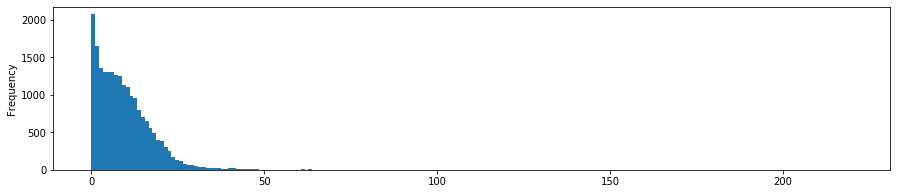

In [58]:
df_euclid['km_distance'].plot.hist(bins=200, figsize=(15,3))

In [54]:
df_euclid['km_distance'].describe()

count    21273.000000
mean         9.693201
std          9.601335
min          0.000000
25%          3.517778
50%          8.033140
75%         13.588437
max        220.031908
Name: km_distance, dtype: float64

In [56]:
df_euclid.sort_values(by='km_distance', ascending=False)

,sido,sigungu,sigungu_split,bjdong,hjdong,latitude,longitude,poi_name,sido_nm,sgg_nm,bemd_nm,ri_nm,beonji,dong_y,dong_x,distance,km_distance
18666,경상북도,울릉군,NaN,독도리,울릉읍,37.241272,131.864940,울진작은영화관,경상북도,울진군,울진읍,읍내리,77-2,36.995075,129.40257,2.713857,220.031908
1820,인천광역시,옹진군,NaN,연화리,백령면,37.942135,124.634390,와우4D파크,경기도,파주시,탄현면,법흥리,1652-155,37.781630,126.69745,2.213063,181.984687
1819,인천광역시,옹진군,NaN,가을리,백령면,37.961440,124.650890,와우4D파크,경기도,파주시,탄현면,법흥리,1652-155,37.781630,126.69745,2.215868,180.744709
1818,인천광역시,옹진군,NaN,북포리,백령면,37.960342,124.674940,와우4D파크,경기도,파주시,탄현면,법흥리,1652-155,37.781630,126.69745,2.190720,178.634621
1821,인천광역시,옹진군,NaN,남포리,백령면,37.931797,124.677284,와우4D파크,경기도,파주시,탄현면,법흥리,1652-155,37.781630,126.69745,2.159831,178.138854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21173,제주특별자치도,제주시,NaN,한원리,한경면,NaN,NaN,CGV,경상북도,포항시 북구,덕산동,NaN,235-4,36.042060,129.36417,NaN,NaN
21183,제주특별자치도,제주시,NaN,서광리,우도면,NaN,NaN,CGV,경상북도,포항시 북구,덕산동,NaN,235-4,36.042060,129.36417,NaN,NaN
21184,제주특별자치도,제주시,NaN,천진리,우도면,NaN,NaN,CGV,경상북도,포항시 북구,덕산동,NaN,235-4,36.042060,129.36417,NaN,NaN
21185,제주특별자치도,제주시,NaN,조일리,우도면,NaN,NaN,CGV,경상북도,포항시 북구,덕산동,NaN,235-4,36.042060,129.36417,NaN,NaN


In [61]:
with open('./data/analysis.json', 'w', encoding='utf-8') as file:
    df_euclid[['sido','sigungu','sigungu_split','bjdong','hjdong','poi_name','sido_nm','sgg_nm','bemd_nm','ri_nm','beonji','distance','km_distance']].sort_values(by='sido').to_json(file, force_ascii=False,orient='records')

In [60]:
df_euclid[['sido','sigungu','sigungu_split','bjdong','hjdong','poi_name','sido_nm','sgg_nm','bemd_nm','ri_nm','beonji','distance','km_distance']].sort_values(by='sido')

,sido,sigungu,sigungu_split,bjdong,hjdong,poi_name,sido_nm,sgg_nm,bemd_nm,ri_nm,beonji,distance,km_distance
5405,강원도,동해시,NaN,초구동,망상동,디지털영화관,강원도,동해시,천곡동,NaN,1073-2,0.069442,5.794467
5856,강원도,영월군,NaN,내리,김삿갓면,고한시네마,강원도,정선군,고한읍,고한리,63-55,0.264407,18.351613
5855,강원도,영월군,NaN,외룡리,김삿갓면,영월시네마,강원도,영월군,영월읍,영흥리,990-2,0.257961,18.999580
5854,강원도,영월군,NaN,와석리,김삿갓면,영월시네마,강원도,영월군,영월읍,영흥리,990-2,0.235257,17.382443
5853,강원도,영월군,NaN,주문리,김삿갓면,영월시네마,강원도,영월군,영월읍,영흥리,990-2,0.198044,14.794095
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7064,충청북도,제천시,NaN,금성면,금성면,시네마360,충청북도,제천시,청풍면,물태리,98-2,0.062225,6.459575
7063,충청북도,제천시,NaN,삼거리,봉양읍,메가박스,충청북도,제천시,남천동,NaN,1145,0.099700,7.035844
7062,충청북도,제천시,NaN,마곡리,봉양읍,시네마360,충청북도,제천시,청풍면,물태리,98-2,0.125048,10.060429
7072,충청북도,제천시,NaN,적덕리,금성면,시네마360,충청북도,제천시,청풍면,물태리,98-2,0.070483,6.615245


In [66]:
df_theater = df_theater[['poi_nm','sido_nm','sgg_nm','bemd_nm','ri_nm','beonji','badm_cd','hadm_cd','x','y']]
df_theater.sort_values(by='sido_nm')

,poi_nm,sido_nm,sgg_nm,bemd_nm,ri_nm,beonji,badm_cd,hadm_cd,x,y
id,,,,,,,,,,
KC497PP19N001126,캠프DVD앤VIDEO,강원도,춘천시,효자동,NaN,632-1,4211011200,4211064000,127.744902,37.872760
KC497PP19N000561,메가박스,강원도,원주시,반곡동,NaN,1903-3,4213011700,4213067500,127.986484,37.327802
KC497PP19N001117,아이맥스영화관,강원도,속초시,조양동,NaN,1545-1,4221010800,4221058000,128.582599,38.190817
KC497PP19N000243,씨네파크,강원도,인제군,북면,원통리,711-18,4281032021,4281032000,128.203134,38.122570
KC497PP19N001127,CGV,강원도,춘천시,퇴계동,NaN,1017,4211012300,4211066000,127.744049,37.850664
...,...,...,...,...,...,...,...,...,...,...
KC497PP19N001049,CGV,충청북도,청주시 흥덕구,가경동,NaN,1416-3,4311311300,4311374700,127.431152,36.626178
KC497PP19N000655,향수시네마,충청북도,옥천군,옥천읍,문정리,408-15,4373025022,4373025000,127.575640,36.304000
KC497PP19N000658,럭셔리박스,충청북도,청주시 청원구,내덕동,NaN,721-14,4311410200,4311452000,127.477775,36.659410


In [67]:
with open('./data/theater.json', 'w', encoding='utf-8') as file:
    df_theater.sort_values(by='sido_nm').to_json(file, force_ascii=False,orient='records')
